In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # to avoid warnings

import random
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

"""
Sklearn Libraries
"""
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split

"""
Transformer Libraries
"""
!pip install transformers
from transformers import BertTokenizer,  AutoModelForSequenceClassification, AdamW, get_linear_schedule_with_warmup

"""
Pytorch Libraries
"""
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 114.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 26.5 MB/s eta 0:00:00


In [ ]:
esg_data = pd.read_csv("/content/drive/MyDrive/kpmg_personal/concat.csv", 
                             encoding='utf-8')

In [ ]:
esg_data

,contents,category
0,이를 유해화학물질 취급시설을 지속적으로 개선하여 화관법 취급시설 최초 검사 결과 발...,e
1,관리 변화와 평가하기 공개합니다 따라 위험과 사용된 기후 기회를 지표를 b. Sco...,e
2,"[투입정보 및 가정, 분석방법] 국내외사업장의 18년 21년 배출량, 디스플레이 업...",e
3,향후 목표한 바를 향해 공백기술 개발 및 수소 활용처 확대를 위한 사업을 지속적으로...,e
4,"2021년 기준 총 3,317명의 인원이 이수하여 및 위해성을 관리하고 있습니다. ...",e
...,...,...
3299,이와 같이 어떤 물체가 양전기와 음전기만을 띠는 대전체로부터 외부에 나타나는 전기적...,중립
3300,이 중 외부 시나리오에 따른 재무적 영향 측정이 필요한 요인은 8개인 것으로 확인되...,중립
3301,(87) 64 (94) 48 (92) 4 (100) 5 (71) 13 (57) 23...,중립
3302,전자결재 시스템과 연동된 전자계약 시스템을 운영하여 사전 품의를 거쳐 정해진 표준계...,중립


Text(0, 0.5, 'Number of Contents')

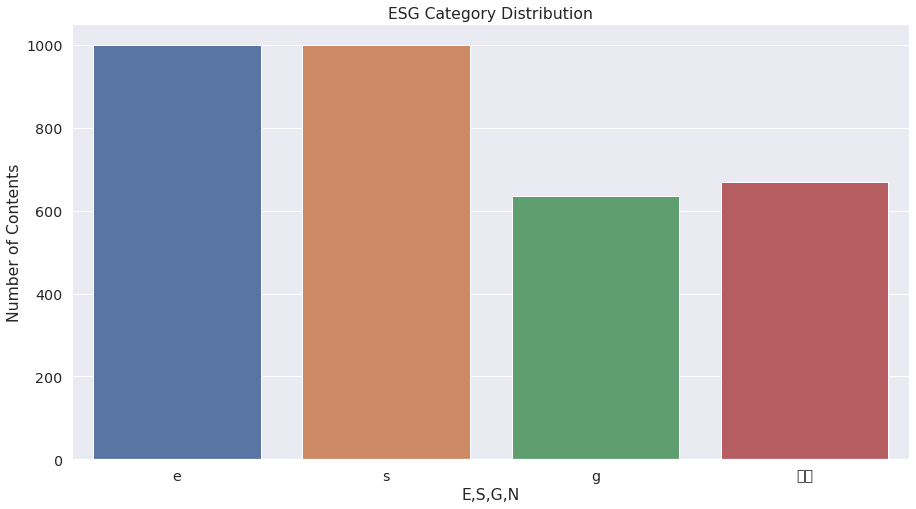

In [ ]:
plt.figure(figsize = (15,8))

sns.set(style='darkgrid')
    
# Increase information on the figure
sns.set(font_scale=1.3)
sns.countplot(x='category', data = esg_data)
plt.title('ESG Category Distribution')
plt.xlabel('E,S,G,N')
plt.ylabel('Number of Contents')

In [ ]:
def show_random_contents(total_number, df):
    
    # Get the random number of reviews
    n_contents = df.sample(total_number)
    
    # Print each one of the reviews
    for val in list(n_contents.index):
        print("Contents #°{}".format(val))
        print(" - Category: {}".format(df.iloc[val]["category"]))
        print(" - Contents: {}".format(df.iloc[val]["contents"]))
        print("")
        
# Show 5 random headlines
show_random_contents(5, esg_data)

Contents #°3272
 - Category: 중립
 - Contents: 또한, 다가올 6G 시대를 대비하여 기존 무선통신 기술의 패 러다임을 전환하는 세계 최고수준의 새로운 기술들을 지속적으로 연구 개발하고자 합니다.

Contents #°1678
 - Category: s
 - Contents: 해당 사고로 지원자의 이메일, 휴대전화번호 등 연락처 정보는 유출되지 않았으나, 이름, 생년월일, 성별 등 일부 개인식별정보가 유출되었습니다. SK그룹은 채용 포털에 금번 사고에 대한 사과문을 즉시 게제 하고, 개인정보가 유출된 지원자에게 문자 메시지와 이메일을 통해 사고 내용에 대해 별도로 안내했습니다.

Contents #°2426
 - Category: g
 - Contents: 노동 및 인권(Labor & Human Rights) 1.1 차별 금지 1.2 가혹행위 금지 두산퓨얼셀㈜의 협력회사는 고용과 승진, 보상, 교육훈련 기회 제공 등과 같은 고용 관행에 있어서 인종, 피부색, 연령, 성별, 성적 성향, 민족, 장애, 건강상태, 임신, 종교, 정치 성향, 노조 가입, 국적, 결혼 여부에 대한 불법적인 차별과 괴롭힘이 없는 작업장을 조성하기 두산퓨얼셀㈜의 협력회사는 모든 근로자를 존중해야 하며, 근로자에 대한 성희롱, 성적 학대, 체벌, 정신적이거나 육체적인 강압, 폭언, 직장에서의 불합리한 제한 등 가혹하거나 비인도적인 대우가 없어야 하며, 그러한 대우를 하겠다는 협박도 없도록 해야 한다.

Contents #°1595
 - Category: s
 - Contents: 나아가 무역거래에서 자주 발생하는 거래대 보보호 동향과 유의사항을 알리기 위해 수시로 임직원을 대상으로 정보 보호 레터를 발행하고 있습니다. 더불어 메일을 통한 사이버침해사고를 예방하기 위해 매분기 1회 피싱 메일 모의훈련을 실시하고 위반자에 대 해서는 별도 교육을 실시하고 정보보호 벌점을 부과하는 등 후속 조치 를 취하여 임직원의 정보보호 인식 제고 활동을 전개하고 있습니다.

Co

In [ ]:
def encode_categories_values(df):
    
    possible_categories = df.category.unique()
    category_dict = {}
    
    for index, possible_category in enumerate(possible_categories):
        category_dict[possible_category] = index
    
    # Encode all the sentiment values
    df['label'] = df.category.replace(category_dict)
    
    return df, category_dict
 
# Perform the encoding task on the data set
esg_data, category_dict = encode_categories_values(esg_data)

In [ ]:
category_dict

{'e': 0, 's': 1, 'g': 2, '중립': 3}

In [ ]:
X_train,X_val, y_train, y_val = train_test_split(esg_data.index.values, 
                                                  esg_data.label.values, 
                                                  test_size = 0.15, 
                                                  random_state = 2022, 
                                                  stratify = esg_data.label.values)

In [ ]:
esg_data.loc[X_train, 'data_type'] = 'train'
esg_data.loc[X_val, 'data_type'] = 'val'

# Vizualiez the number of sentiment occurence on each type of data
esg_data.groupby(['category', 'label', 'data_type']).count()

contents
category label data_type          
e        0     train           850
               val             150
g        2     train           540
               val              95
s        1     train           850
               val             150
중립       3     train           568
               val             101

In [ ]:
# Get the FinBERT Tokenizer
finbert_tokenizer = BertTokenizer.from_pretrained('snunlp/KR-FinBert-SC', 
                                          do_lower_case=True)

In [ ]:
def get_contents_len(df):
    
    contents_sequence_lengths = []
    
    print("Encoding in progress...")
    for content in tqdm(df.contents):
        encoded_content = finbert_tokenizer.encode(content, 
                                         add_special_tokens = True)
        
        # record the length of the encoded review
        contents_sequence_lengths.append(len(encoded_content))
    print("End of Task.")
    
    return contents_sequence_lengths

def show_contents_distribution(sequence_lengths, figsize = (15,8)):
    
    # Get the percentage of reviews with length > 512
    len_512_plus = [rev_len for rev_len in sequence_lengths if rev_len > 512]
    percent = (len(len_512_plus)/len(sequence_lengths))*100
    
    print("Maximum Sequence Length is {}".format(max(sequence_lengths)))
    
    # Configure the plot size
    plt.figure(figsize = figsize)

    sns.set(style='darkgrid')
    
    # Increase information on the figure
    sns.set(font_scale=1.3)
    
    # Plot the result
    sns.distplot(sequence_lengths, kde = False, rug = False)
    plt.title('Contents Lengths Distribution')
    plt.xlabel('Contents Length')
    plt.ylabel('Number of Contents')
 

Encoding in progress...


100%|██████████| 3304/3304 [00:07<00:00, 461.31it/s]


End of Task.
Maximum Sequence Length is 445


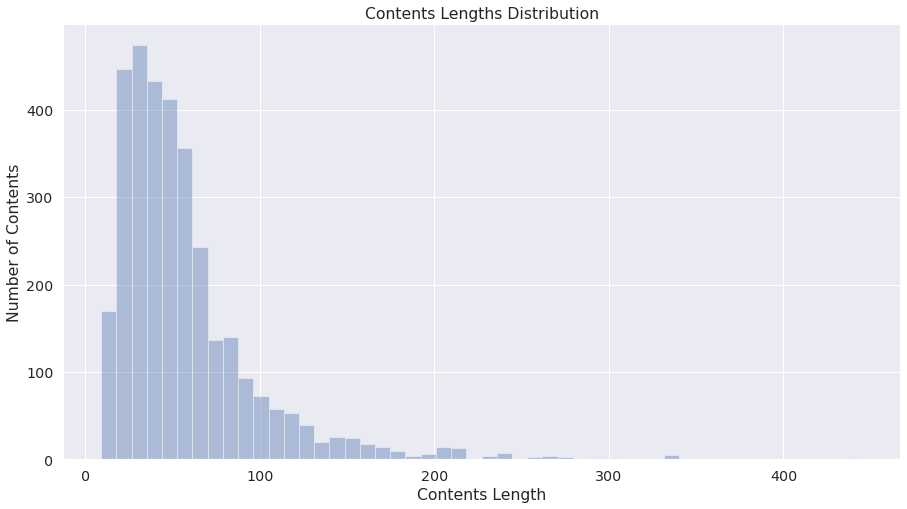

In [ ]:
show_contents_distribution(get_contents_len(esg_data))

In [ ]:
# Encode the Training and Validation Data
encoded_data_train = finbert_tokenizer.batch_encode_plus(
    esg_data[esg_data.data_type=='train'].contents.values, 
    return_tensors='pt',
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=200 # the maximum lenght observed in the headlines
)

encoded_data_val = finbert_tokenizer.batch_encode_plus(
    esg_data[esg_data.data_type=='val'].contents.values, 
    return_tensors='pt',
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=200 # the maximum length observed in the headlines
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(esg_data[esg_data.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
sentiments_val = torch.tensor(esg_data[esg_data.data_type=='val'].label.values)


dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, sentiments_val)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("snunlp/KR-FinBert-SC",
                                                          num_labels=len(category_dict),
                                                          output_attentions=False,
                                                          output_hidden_states=False,
                                                           ignore_mismatched_sizes=True)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at snunlp/KR-FinBert-SC and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
batch_size = 5

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in category_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

def classified_how(preds, labels):
    label_dict_inverse = {v: k for k, v in category_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        labellist = np.unique(labels_flat)
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Real Class: {label_dict_inverse[label]}')
        for i in labellist:
          print(f'Classified as {label_dict_inverse[i]}: {len(y_preds[y_preds==i])}')
        print('\n')

In [ ]:
A=np.array([1,2,3])
myindex = np.where(A==2)
print(myindex)
B = np.delete(A, myindex)
B

(array([1]),)


array([1, 3])

In [ ]:
seed_val = 2022
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals


for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
    torch.save(model.state_dict(), f'finetuned_finBERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/10 [02:08<?, ?it/s]


Epoch 1
Training loss: 1.202548620247968


 10%|█         | 1/10 [02:14<20:13, 134.80s/it]

Validation loss: 0.9686285559926182
F1 Score (Weighted): 0.3880024872929037



 10%|█         | 1/10 [04:20<20:13, 134.80s/it]


Epoch 2
Training loss: 0.9715497179281669


 20%|██        | 2/10 [04:26<17:43, 132.95s/it]

Validation loss: 0.9321071878983639
F1 Score (Weighted): 0.5076066549216525



 20%|██        | 2/10 [06:31<17:43, 132.95s/it]


Epoch 3
Training loss: 0.9212681797873296


 30%|███       | 3/10 [06:37<15:25, 132.20s/it]

Validation loss: 0.910009914629627
F1 Score (Weighted): 0.5264915894213443



 30%|███       | 3/10 [08:41<15:25, 132.20s/it]


Epoch 4
Training loss: 0.8517843849817788


 40%|████      | 4/10 [08:48<13:08, 131.44s/it]

Validation loss: 0.9233930123993196
F1 Score (Weighted): 0.5532256985682775



 40%|████      | 4/10 [10:52<13:08, 131.44s/it]


Epoch 5
Training loss: 0.7749852665059527


 50%|█████     | 5/10 [10:59<10:56, 131.28s/it]

Validation loss: 0.9528413769952021
F1 Score (Weighted): 0.5510718808572519



 50%|█████     | 5/10 [13:04<10:56, 131.28s/it]


Epoch 6
Training loss: 0.7186590644110034


 60%|██████    | 6/10 [13:10<08:45, 131.38s/it]

Validation loss: 1.1010367132595276
F1 Score (Weighted): 0.5676692343258323



 60%|██████    | 6/10 [15:15<08:45, 131.38s/it]


Epoch 7
Training loss: 0.6561341636592118


 70%|███████   | 7/10 [15:21<06:34, 131.34s/it]

Validation loss: 1.1620301621773979
F1 Score (Weighted): 0.5761604936878015



 70%|███████   | 7/10 [17:26<06:34, 131.34s/it]


Epoch 8
Training loss: 0.5919541816941373


 80%|████████  | 8/10 [17:32<04:22, 131.10s/it]

Validation loss: 1.200595609069569
F1 Score (Weighted): 0.553584926325473



 80%|████████  | 8/10 [19:37<04:22, 131.10s/it]


Epoch 9
Training loss: 0.5064846820291629


 90%|█████████ | 9/10 [19:44<02:11, 131.30s/it]

Validation loss: 1.3499907164246543
F1 Score (Weighted): 0.585746146198572



 90%|█████████ | 9/10 [21:49<02:11, 131.30s/it]


Epoch 10
Training loss: 0.46838028289193745


100%|██████████| 10/10 [21:55<00:00, 131.56s/it]

Validation loss: 1.3916149203566601
F1 Score (Weighted): 0.5827599494993924


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("snunlp/KR-FinBert-SC",
                                                          num_labels=len(category_dict),
                                                          output_attentions=False,
                                                          output_hidden_states=False,
                                                           ignore_mismatched_sizes=True)

model.to(device)

for i in range(1,11):
  model.load_state_dict(torch.load(f'finetuned_finBERT_epoch_{i}.model', 
                                  map_location=torch.device('cpu')))

  _, predictions, true_vals = evaluate(dataloader_validation)
  print(f'epoch {i}:')
  print('\n')
  accuracy_per_class(predictions, true_vals)
  print('-----------------------------------')
# max_length = 200

In [ ]:
classified_how(predictions, true_vals)

Real Class: e
Classified as e: 66
Classified as s: 70
Classified as g: 12
Classified as 중립: 2


Real Class: s
Classified as e: 32
Classified as s: 98
Classified as g: 20
Classified as 중립: 0


Real Class: g
Classified as e: 14
Classified as s: 55
Classified as g: 26
Classified as 중립: 0


Real Class: 중립
Classified as e: 2
Classified as s: 0
Classified as g: 4
Classified as 중립: 95




In [ ]:
save_directory = '/content/drive/MyDrive/kpmg_personal'
model.save_pretrained(save_directory)
# 저장된 모델 불러오기: pt_model = AutoModelForSequenceClassification.from_pretrained(save_directory)

In [ ]:
'''
classdict = {'e': 0, 's': 0, 'g': 0, '중립': 0}

for pred in predictions:
  maxvalue = pred.argmax()
  me = list(classdict)[maxvalue]
  classdict[me] += 1
classdict
'''

{'e': 114, 's': 223, 'g': 62, '중립': 97}

In [ ]:
#classficiation_report(true_vals, predictions)

NameError: ignored